# Comparing numerical distributions

---
## Independent samples


### Exercise
Is there a significant difference between the sepal widths of the species *Iris versicolor* and *Iris virginica*? (the data is in *iris.csv*)

Write down the hypotheses:

* $H_0$: there is no difference in mean sepal width between the two populations, $\mu_{virginica} = \mu_{versicolor}$
* $H_1$: there is a real difference between the two populations, $\mu_{virginica} \ne \mu_{versicolor}$

Choose a significance level:
$\alpha = 0.05$

Visualise the data:

In [9]:
import pandas as pd
iris = pd.read_csv('../Data/iris.csv')
versicolor = iris.query("species == 'Iris-versicolor'")
virginica = iris.query("species == 'Iris-virginica'")

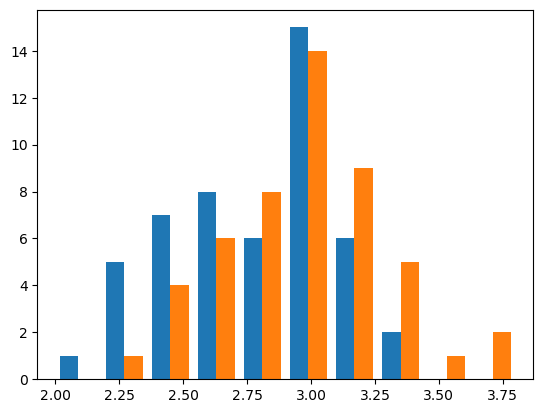

In [10]:
import matplotlib.pyplot as plt
plt.hist([versicolor.sepal_width, virginica.sepal_width], 
         label = ['versicolor','virginica'])
plt.show()

In [11]:
virginica.sepal_width.mean()

np.float64(2.974)

In [12]:
versicolor.sepal_width.mean()

np.float64(2.7700000000000005)

Carry out the hypothesis test:

In [13]:
from scipy.stats import ttest_ind
ttest_ind(versicolor.sepal_width, virginica.sepal_width)

TtestResult(statistic=np.float64(-3.2057607502218186), pvalue=np.float64(0.0018191004238894803), df=np.float64(98.0))

$p < \alpha$ , therefore we reject the null hypothesis. There is a significant difference between the two means.


---
## Alternatives to the t-test




### Exercise

The UN Kyoto protocol was adopted in 1997 and commits developed countries to limit and reduce their greenhouse gas emissions. Due to the complexities of the ratification process, it did not come into force until 2005.

Did the CO2 outputs of western European countries change significantly between 1997 and 2005?

We will compare the relevant set of CO2 outputs for the two years.

The countries are the same in each sample so this is a paired comparison.

We will use $\alpha = 0.05$ as before.

First step is to obtain the country names:

In [14]:
countries = pd.read_excel("../Data/data_geographies_v1.xlsx", sheet_name = "list-of-countries-etc")

In [15]:
europe_west = countries.query("eight_regions == 'europe_west'").name.values
europe_west

array(['Andorra', 'Austria', 'Belgium', 'Cyprus', 'Denmark', 'France',
       'Germany', 'Greece', 'Holy See', 'Iceland', 'Ireland', 'Italy',
       'Liechtenstein', 'Luxembourg', 'Malta', 'Monaco', 'Netherlands',
       'Norway', 'Poland', 'Portugal', 'San Marino', 'Spain', 'Sweden',
       'Switzerland', 'United Kingdom'], dtype=object)

Now load the CO2 data and use a query to select the relevant countries.

In [16]:
co2 = pd.read_csv("../Data/yearly_co2_emissions_1000_tonnes.csv")

In [17]:
europe_west_co2 = co2.query("country in @europe_west")

In [18]:
df = europe_west_co2[['country','1997','2005']].dropna()

In [19]:
df

,country,1997,2005
3,Andorra,466.0,576.0
9,Austria,62700.0,74200.0
16,Belgium,115000.0,109000.0
44,Cyprus,5860.0,7500.0
46,Denmark,61600.0,47100.0
59,France,352000.0,385000.0
63,Germany,862000.0,797000.0
65,Greece,83700.0,98700.0
74,Iceland,2100.0,2230.0
79,Ireland,36400.0,43500.0


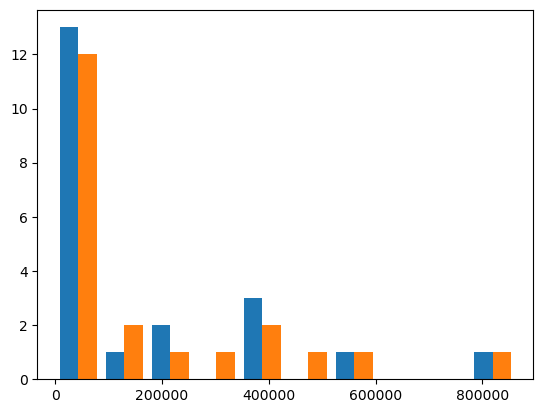

In [20]:
plt.hist([df['1997'],df['2005']])
plt.show()

In [21]:
df.shape

(21, 3)

Clearly the distribution is not normal. Because there are few data (<30) we cannot rely on the t-test. It is better in this case to use the non-parametric paired test (the Wilcoxon signed-rank test).

In [22]:
from scipy.stats import wilcoxon
wilcoxon(df['2005'],df['1997'])

WilcoxonResult(statistic=np.float64(71.0), pvalue=np.float64(0.12807846069335938))

The result ($p > \alpha$) shows that there is no evidence that western European countries as a whole changed their CO2 outputs during this period.

---